# Analysing data

### Importing data and basic libraries

In [78]:
import numpy as np
import pandas as pd

import os
print(os.listdir("Input"))

['500_Person_Gender_Height_Weight_Index.csv']


In [79]:
data = pd.read_csv('Input/500_Person_Gender_Height_Weight_Index.csv')
data_visual = pd.read_csv('Input/500_Person_Gender_Height_Weight_Index.csv')

In [80]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [81]:
data.shape

(500, 4)

### Missing values ?

**We would have applied an Imputer object for handling missing values, if there were any.**

In [82]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

### Importing visualization and plotting libraries

In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [84]:
sns.__version__

'0.12.2'

### Adding additional columns to DataFrame as per need

In [85]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [86]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


### Scatter plot showing different categories for all points in data

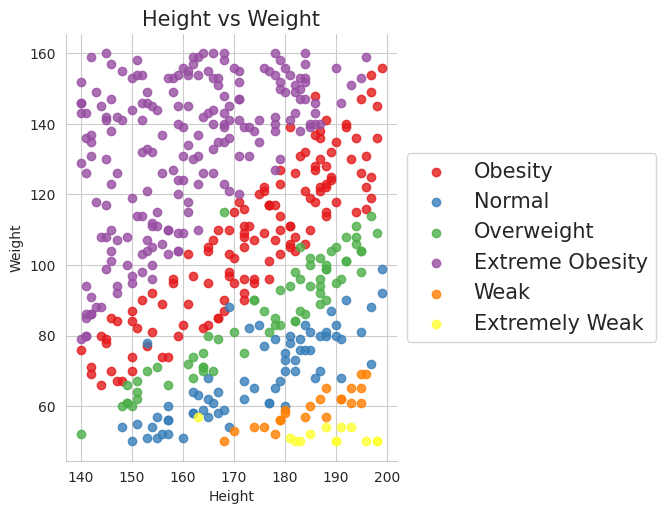

In [87]:
sns.set_style('whitegrid')
sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

### 3-D Scatter plot to differentiate b/w male and female

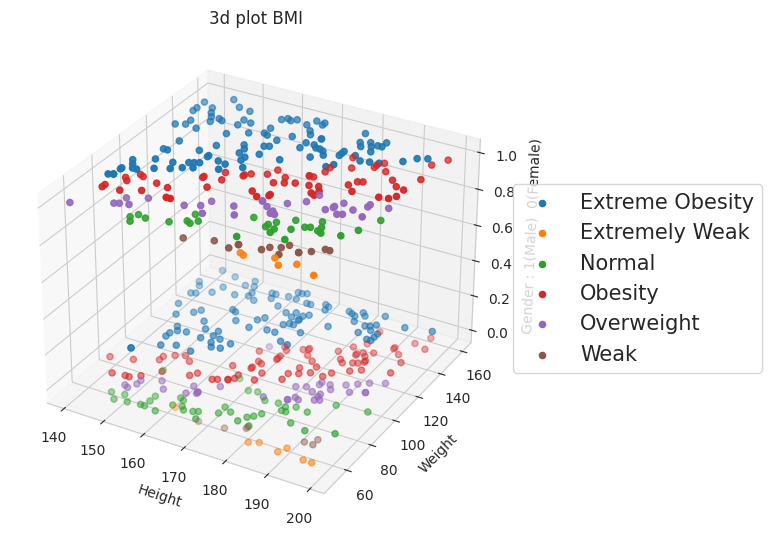

In [88]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

**Counting people based on Gender, Health status, etc.**

In [89]:
people = data_visual['Gender'].value_counts()
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [90]:
categories = data_visual['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

### Doughnut plot (pie-plot) representing features (Gender, Health Status) for all people

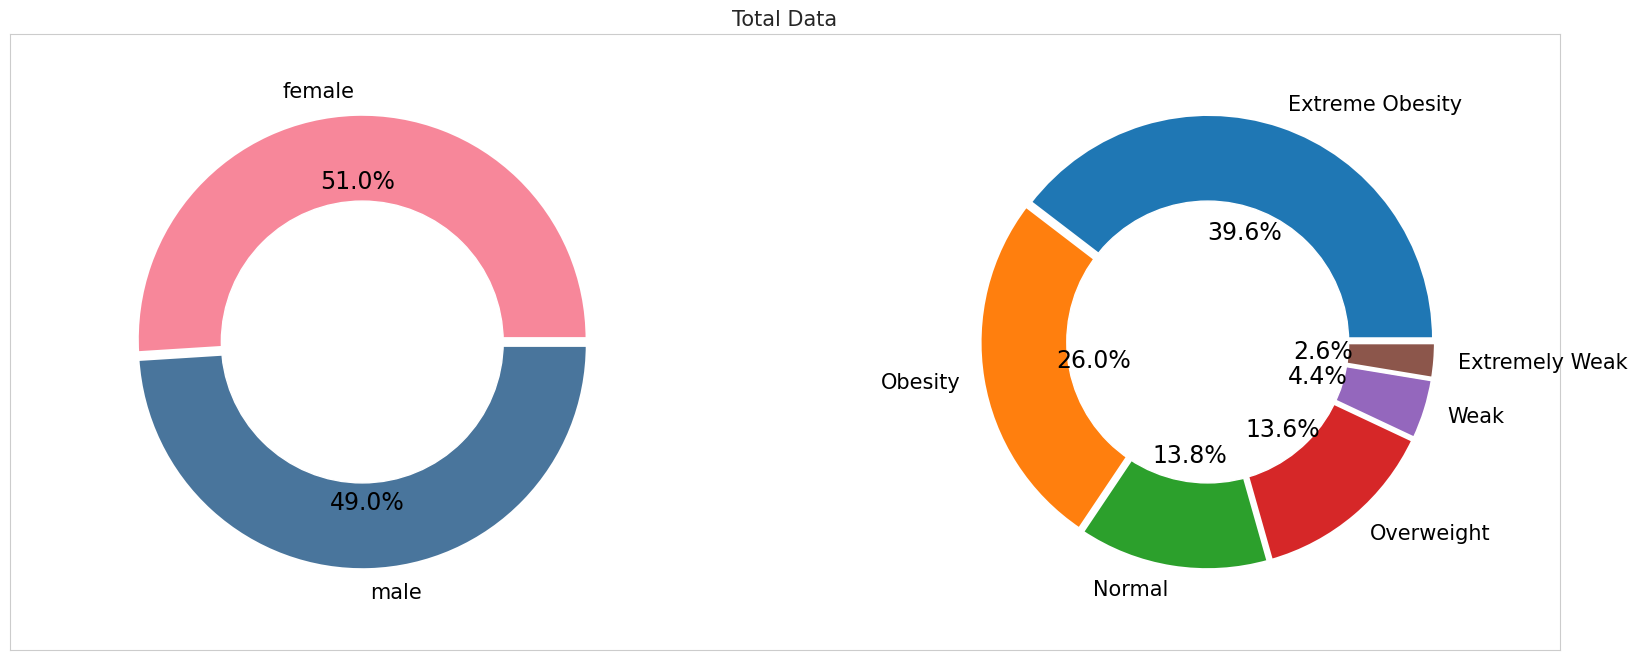

In [91]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

In [92]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [93]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [94]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [95]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: Status, dtype: int64

### Doughnut plot (pie-plot) representing Health Status for Female and Male

Text(0, 0, 'Male')

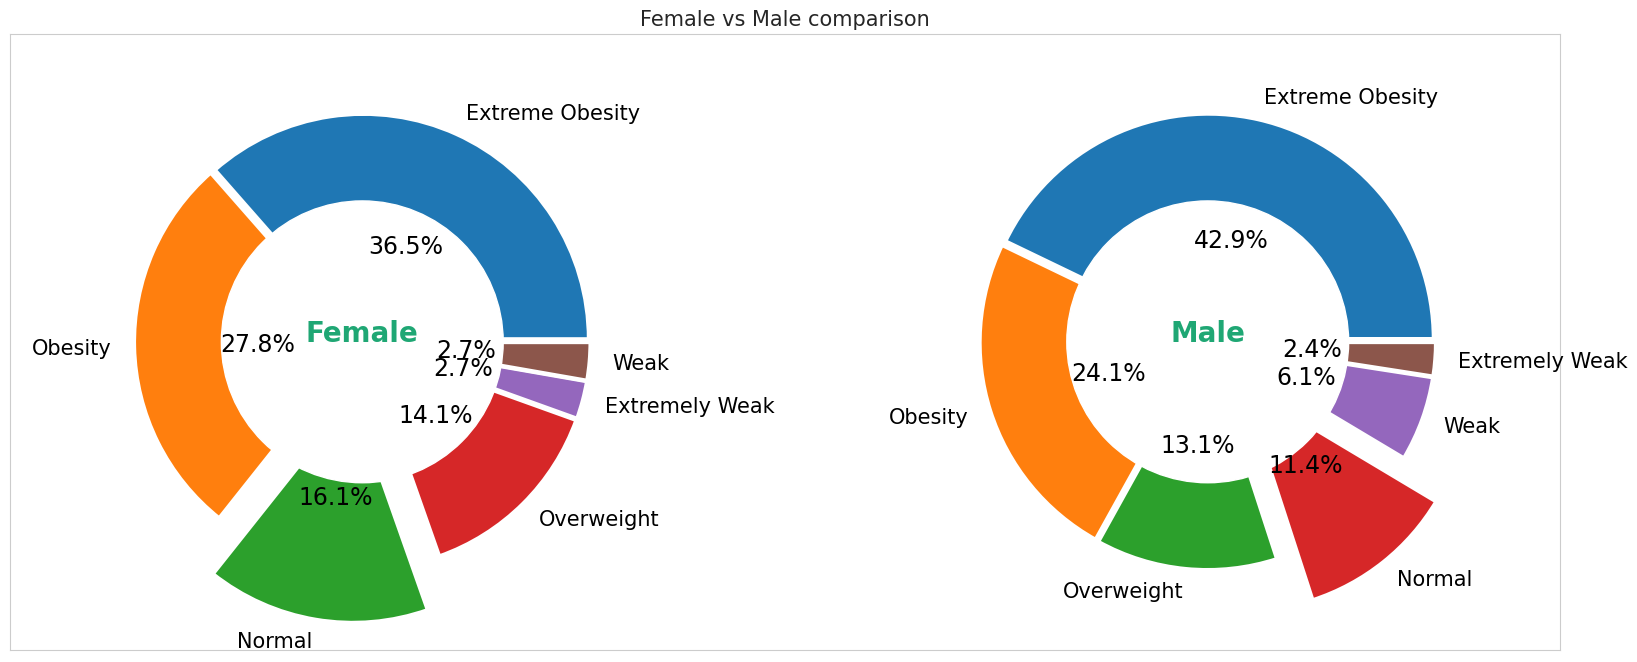

In [96]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Machine Learning

### Importing libraries and Encoding categorical values

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearnex import patch_sklearn
patch_sklearn()
transformer = ColumnTransformer(
    transformers=[
        ("one_hot_enc_for_gender", OneHotEncoder(), [0])
    ],
    remainder="passthrough"
)
data = transformer.fit_transform(data)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [98]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,0.0,1.0,174.0,96.0,4.0
1,0.0,1.0,189.0,87.0,2.0
2,1.0,0.0,185.0,110.0,4.0
3,1.0,0.0,195.0,104.0,3.0
4,0.0,1.0,149.0,61.0,3.0


### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearnex import patch_sklearn
patch_sklearn()
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [100]:
df.head()

,0,1,2,3,4
0,-1.020204,1.020204,0.247939,-0.309117,4.0
1,-1.020204,1.020204,1.164872,-0.587322,2.0
2,0.980196,-0.980196,0.920357,0.123647,4.0
3,0.980196,-0.980196,1.531645,-0.061823,3.0
4,-1.020204,1.020204,-1.280283,-1.391027,3.0


### Splitting data into training and testing sets

In [101]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn
patch_sklearn()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [103]:
print(type(X_train))
X_train.head() 

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
107,-1.020204,1.020204,-0.668995,1.483762
336,0.980196,-0.980196,-0.179963,1.452850
71,-1.020204,1.020204,0.492454,0.340029
474,0.980196,-0.980196,-0.179963,-0.834616
6,-1.020204,1.020204,-1.402541,-0.432764


### Ensemble Learning (Random Forest Classification)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn
patch_sklearn()
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

### Prediciting results

In [105]:
y_pred_rfc = rfc.predict(X_test)

### Accuracy measurements

In [106]:
from sklearn.metrics import confusion_matrix
from sklearnex import patch_sklearn
patch_sklearn()
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  8,  2,  0,  0],
       [ 0,  0,  1, 12,  2,  0],
       [ 0,  0,  1,  0, 28,  3],
       [ 0,  0,  0,  0,  0, 36]])

In [107]:
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


91.0

### Calculation of optimal number of trees in Random Forest

In [108]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [109]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `m

[0.9, 0.91, 0.91, 0.9, 0.9, 0.9]

**Visualisation of No. of Trees and their corresponding Accracy scores**

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.90
1,200,0.91
2,300,0.91
3,500,0.90
4,700,0.90


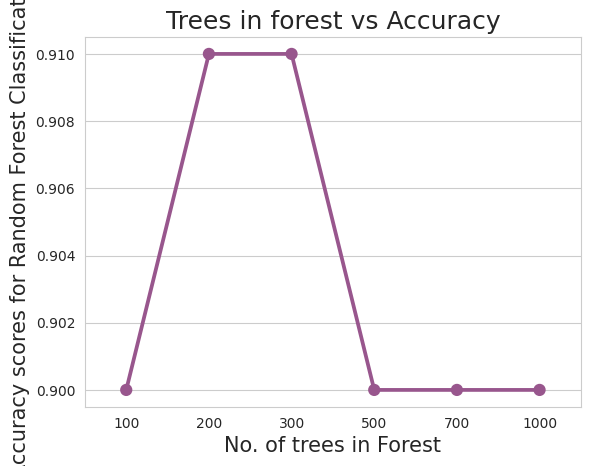

In [110]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})

sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)

tree_vs_acc.head()

### Code snippet for testing other person's Health Status based on the above model

In [111]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn
patch_sklearn()

transformer = ColumnTransformer(
    transformers=[
        ("one_hot_enc_for_gender", OneHotEncoder(), [0])
    ],
    remainder=StandardScaler()
)

data = pd.read_csv("Input/500_Person_Gender_Height_Weight_Index.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = transformer.fit_transform(X)

rfc = RandomForestClassifier()
rfc.fit(X, y)

def health_test(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    individual_data_dict = {'Gender':gender, 'Height':height, 'Weight':weight}   
    individual_data = pd.DataFrame(data = individual_data_dict, index=[0])
    individual_data = transformer.transform(individual_data)
    
    y_pred = rfc.predict(individual_data)
    
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [115]:
sample_person = ['Female',155,58]
sample_result = health_test(*sample_person)
print(sample_result)

Normal
